# Notebook to find out overlap between scrapes
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from politics.text_agent import TextAgent

fox_muller_df = pd.read_csv('scrapes/Fox_Muller_Results_04212019_2143.csv',encoding="latin1",index_col=0).reset_index(drop=True)
fox_elect_df = pd.read_csv('scrapes/Fox_2020Elections_Results_04212019_2358.csv',encoding="latin1",index_col=0).reset_index(drop=True)

pol_muller_df = pd.read_csv('scrapes/Politico_MullerReport_Results_04212019_1806.csv',encoding="latin1",index_col=0).reset_index(drop=True)
pol_elect_df = pd.read_csv('scrapes/Politico_2020Elections_Results_04212019_1836.csv',encoding="latin1",index_col=0).reset_index(drop=True)

In [2]:
muller = fox_muller_df[fox_muller_df['title'].isin(fox_elect_df['title'])]
elect = fox_elect_df[fox_elect_df['title'].isin(fox_muller_df['title'])]
if muller.empty and elect.empty:
    print("No overlap!")
else:
    print('Fuk.... Overlap: {}'.format(muller.shape[0] + elect.shape[0]))

No overlap!


In [3]:
muller = pol_muller_df[pol_muller_df['title'].isin(pol_elect_df['title'])]
elect = pol_elect_df[pol_elect_df['title'].isin(pol_muller_df['title'])]
if muller.empty and elect.empty:
    print("No overlap!")
else:
    print('Fuk.... Overlap: {}'.format(muller.shape[0] + elect.shape[0]))

No overlap!


In [4]:
print('Fox Muller Shape: ', fox_muller_df.shape)
print('Fox Elect Shape: ', fox_elect_df.shape)
print('Pol Muller Shape: ', pol_muller_df.shape)
print('Pol Elect Shape: ', pol_elect_df.shape)

Fox Muller Shape:  (168, 2)
Fox Elect Shape:  (24, 2)
Pol Muller Shape:  (117, 2)
Pol Elect Shape:  (54, 2)


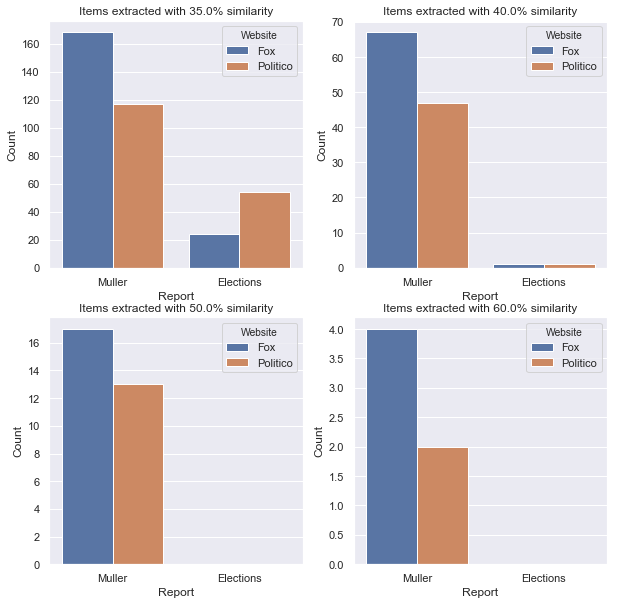

In [44]:
freqs = [.35, .4, .5, .6]
def agent_trim(agent, df):
    for index,row in df.iterrows():
        agent.should_append(pd.DataFrame({
                'title': [row['title']],
                'body': [row['body']],
            }), continual_save=False)
    return agent
sns.set()
plt.rcParams["figure.figsize"] = (10,10)
index = 1
for freq in freqs:
    fmuller_agent = TextAgent('Muller.txt', 'Muller', freq)
    felect_agent = TextAgent('2020Elections.txt', 'Elections', freq)
    
    pmuller_agent = TextAgent('Muller.txt', 'Muller', freq)
    pelect_agent = TextAgent('2020Elections.txt', 'Elections', freq)
    
    fmuller_agent = agent_trim(fmuller_agent, fox_muller_df)
    felect_agent = agent_trim(felect_agent, fox_elect_df)
    
    pmuller_agent = agent_trim(pmuller_agent, pol_muller_df)
    pelect_agent = agent_trim(pelect_agent, pol_elect_df)
    
    counts = {
        'Muller': fmuller_agent.web_df.shape[0],
        'Elections': felect_agent.web_df.shape[0],
        'Muller': pmuller_agent.web_df.shape[0],
        'Elections': pelect_agent.web_df.shape[0]
    }
    count = [fmuller_agent.web_df.shape[0], felect_agent.web_df.shape[0], pmuller_agent.web_df.shape[0], pelect_agent.web_df.shape[0]]
    report = ['Muller', 'Elections', 'Muller', 'Elections']
    website = ['Fox', 'Fox', 'Politico', 'Politico']
    data = pd.DataFrame({
        'Report': report, 
        'Count': count, 
        'Website': website
    })
    
    plt.subplot(2,2,index)
    sns.barplot(x='Report', y='Count', hue='Website', data=data)
#     plt.bar(names,values)
    plt.title('Items extracted with {}% similarity'.format(freq*100))
    index+=1
plt.savefig('figs/Similarity variance returns.png')
plt.show()
    
    
    